# Final Group Project 🎬
🎥🍿We can do it!🎞️📽️

- `netflix`: The dataset of the netflix.csv file with cleaning null value and imputation
    - `date_added` column: **datetime** data type (Able to extract year, month, day etc...)
- `movies`: subset of the netflix dataset (`netflix[netflix['type'] == 'Movie']`)<br>
- `tv_shows`: subset of the netflix dataset (`netflix[netflix['type'] == 'TV Show']`)<br>

# Data Pre-Processing

## Load Data
Load from the data stored in **Github repository** so that each team member can directly run the code.<br>
__[Tutorial: How to read a CSV file from GitHub on Jupyter Notebook](https://www.youtube.com/watch?v=4xXBDXDSFts)__

In [1]:
# imort library
import pandas as pd

In [9]:
# Load data: load file from github repository
netflix = pd.read_csv('https://raw.githubusercontent.com/GrantCa24/DA_Group6-Final_Project/main/data_raw/netflix.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Assessment

In [10]:
# Check the total of rows and columns)
rows, columns = netflix.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 8807, Columns: 12


In [11]:
# Show all 36 columns name
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [13]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Check and remove Duplicates

In [14]:
# Check for duplicate rows
duplicate_rows = netflix.duplicated()

# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


## Check and remove Null values in all the columns and rows

In [15]:
# Checking for missing values in each column
missing_values = netflix.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [16]:
missing_percentage = missing_values * 100 / len(netflix)
print(missing_percentage)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


In [17]:
# Column: Distinct Value ( by go through all the columns and print the distinct value)
for column in netflix.columns:
    print(column, ": ", netflix[column].unique())

show_id :  ['s1' 's2' 's3' ... 's8805' 's8806' 's8807']
type :  ['Movie' 'TV Show']
title :  ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
director :  ['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
cast :  [nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaus

Dealing with the columns with null value:
1. director: imputate with `Unknown`
2. cast: imputate with `Unknown`
3. country: imputate with `Unknown`
4. date_added: `dropna` since only 0.113%
5. rating: `dropna` since only 0.045%
6. duration: `dropna`since only 0.034%

Strategy:
1. Drop all the rows that contain null value
2. Imputate the remaining null value based on the approach

In [18]:
# Strategy Step1: Drop all the rows that contain null value
netflix.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)
# Show the remaing columns that have null values
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [19]:
# Step2. Imputation: Constant value Imputation: Unknown
netflix['director'].fillna('Unknown', inplace=True)
netflix['cast'].fillna('Unknown', inplace=True)
netflix['country'].fillna('Unknown', inplace=True)

# Checking for missing values again after age imputation
missing_values = netflix.isnull().sum()
print("Missing Values after constant value imputation:")
print(missing_values)

Missing Values after constant value imputation:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


## Data Re-assessment

In [20]:
# Column: Distinct Value ( by go through all the columns and print the distinct value)
for column in netflix.columns:
    print(column, ": ", netflix[column].unique())

show_id :  ['s1' 's2' 's3' ... 's8805' 's8806' 's8807']
type :  ['Movie' 'TV Show']
title :  ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
director :  ['Kirsten Johnson' 'Unknown' 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
cast :  ['Unknown'
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'


In [21]:
rows, columns = netflix.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 8790, Columns: 12


In [22]:
netflix.describe(include="all")
# netflix.describe()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8790,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790,8790
unique,8790,2,8790,4527,7679,749,1765,NaN,14,220,513,8758
top,s1,Movie,Dick Johnson Is Dead,Unknown,Unknown,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6126,1,2621,825,2809,109,NaN,3205,1791,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [23]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [24]:
# Convert the 'date_added' column to datetime
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce') # If there are any invalid date strings that cannot be converted, they will be set to NaT (Not a Time).

In [25]:
netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

Notes: `datetime64[ns]` indicates that the column contains datetime values with **nanosecond precision**.

In [26]:
# Demo of using the 'date_added' column
print(type(netflix['date_added'].iloc[0]))
print(netflix['date_added'].iloc[0])
# Extract year: Timestamp.year
print(netflix['date_added'].iloc[0].year)
# Extract year: Timestamp.month
print(netflix['date_added'].iloc[0].month)
# Extract year: Timestamp.day
print(netflix['date_added'].iloc[0].day)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2021-09-25 00:00:00
2021
9
25


# Exploratory Data Analysis (EDA)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

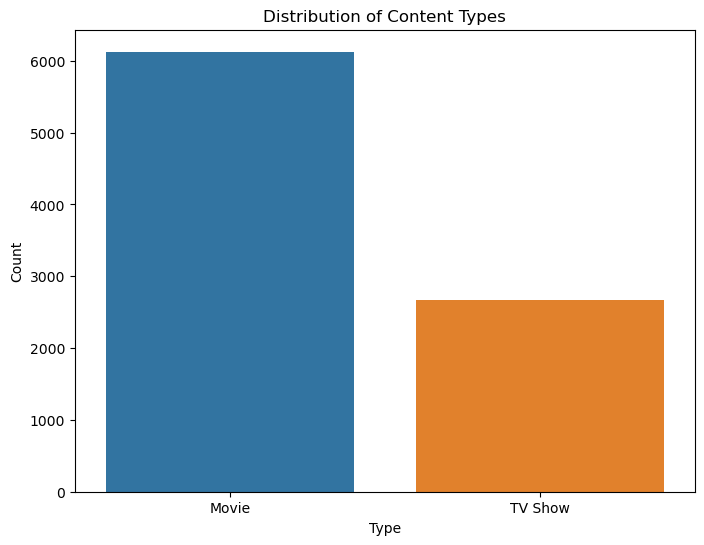

In [28]:
# Distribution of content types (Movies vs TV Shows)
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=netflix) # Show the count of value for a single categorical variable: Type
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

__[`seaborn.countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html)__ can make the distribution of count, we do not need to perform a `group by` function by ourself.

In [29]:
# subset: Movie & TV Show
movies = netflix[netflix['type'] == 'Movie']
tv_shows = netflix[netflix['type'] == 'TV Show']

In [30]:
print("Movie:", movies.shape)
print("TV Show:", tv_shows.shape)

Movie: (6126, 12)
TV Show: (2664, 12)


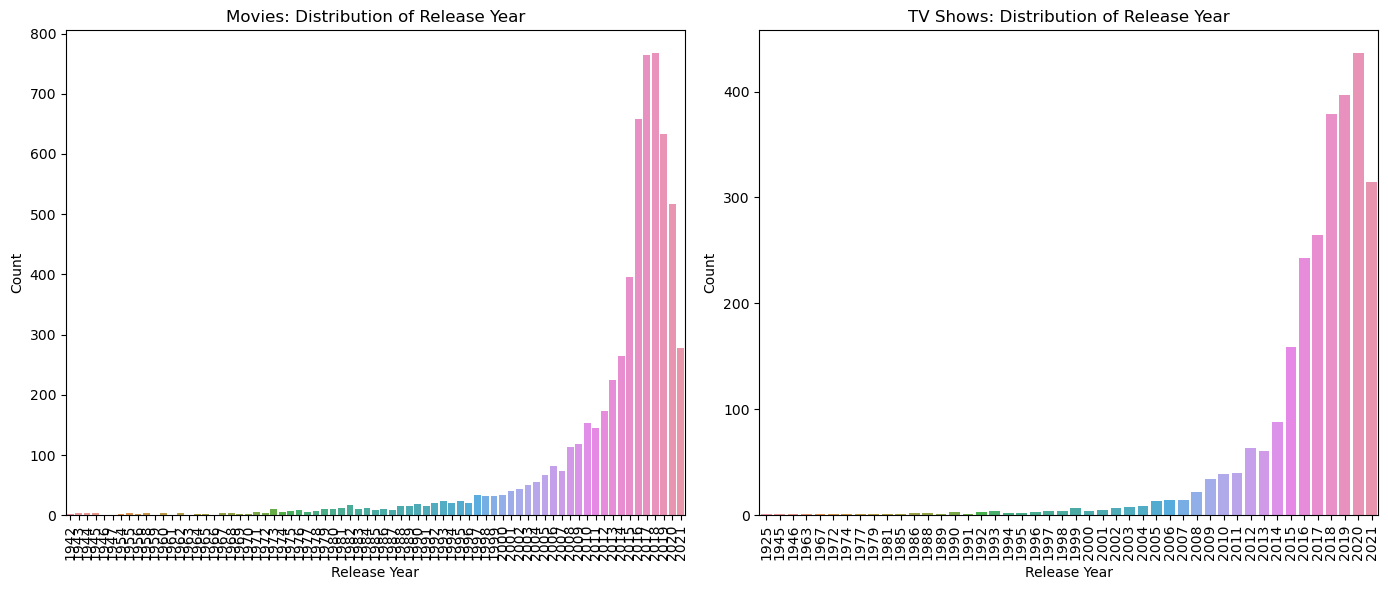

In [31]:
# Plot distribution of release year for both movies and TV shows
plt.figure(figsize=(14, 6))

# Distribution of release year (Movies)
plt.subplot(1, 2, 1) # plt.subplot(nrows, ncols, index)
sns.countplot(x='release_year', data=movies)
plt.title('Movies: Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Distribution of release year (TV Shows)
plt.subplot(1, 2, 2) # plt.subplot(nrows, ncols, index)
sns.countplot(x='release_year', data=tv_shows)
plt.title('TV Shows: Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plots
plt.tight_layout()
plt.show()

In [32]:
netflix['country'].value_counts().head(10)

country
United States     2809
India              972
Unknown            829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

In [33]:
netflix['country'].tail(10)

8797    United States, France, South Korea, Indonesia
8798                                            India
8799                                            India
8800                                         Pakistan
8801                     United Arab Emirates, Jordan
8802                                    United States
8803                                          Unknown
8804                                    United States
8805                                    United States
8806                                            India
Name: country, dtype: object

In [34]:
# Split the 'country' column and count occurrences

# In each row of country data, if they have more than one country, split them into lists
country_lists = netflix['country'].str.split(', ')
print(country_lists)

# Takes the lists created by the split operation and transforms them so that each element of the list becomes a separate row, replicating the index values.
country_series = country_lists.explode()
print(country_series)

country_counts = country_series.value_counts()

print(country_counts)

0       [United States]
1        [South Africa]
2             [Unknown]
3             [Unknown]
4               [India]
             ...       
8802    [United States]
8803          [Unknown]
8804    [United States]
8805    [United States]
8806            [India]
Name: country, Length: 8790, dtype: object
0       United States
1        South Africa
2             Unknown
3             Unknown
4               India
            ...      
8802    United States
8803          Unknown
8804    United States
8805    United States
8806            India
Name: country, Length: 10828, dtype: object
country
United States     3680
India             1046
Unknown            829
United Kingdom     803
Canada             445
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: count, Length: 128, dtype: int64


In [35]:
for i in range(len(country_lists)):
    print(country_lists[i])

['United States']
['South Africa']
['Unknown']
['Unknown']
['India']
['Unknown']
['Unknown']
['United States', 'Ghana', 'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia']
['United Kingdom']
['United States']
['Unknown']
['Unknown']
['Germany', 'Czech Republic']
['Unknown']
['Unknown']
['United States']
['Unknown']
['Mexico']
['Unknown']
['Unknown']
['Unknown']
['Turkey']
['Unknown']
['Unknown']
['India']
['Australia']
['Unknown']
['United States']
['United States']
['United States', 'India', 'France']
['Unknown']
['Unknown']
['United Kingdom']
['Unknown']
['Unknown']
['Unknown']
['Unknown']
['Finland']
['China', 'Canada', 'United States']
['India']
['United States']
['United States']
['United States']
['United States']
['United States']
['Unknown']
['South Africa', 'United States', 'Japan']
['Unknown']
['United States']
['Nigeria']
['India']
['Japan']
['Japan']
['Japan']
['Japan']
['United States']
['Japan']
['Japan']
['Japan']
['Japan']
['Japan']
['Japan']
['Japan']
['Japan']
['

KeyError: 5541

In [ ]:
print(type(country_counts))

In [ ]:
plt.figure(figsize=[12,5])
sns.barplot(x = country_counts.index,y = country_counts.values, color='red', edgecolor='black', linewidth=1)
plt.title('Number of show produced in by Country')
plt.xlabel('Release Year')
plt.ylabel('Count of show')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

In [ ]:
print(type(country_counts))
# Number of countries selected
top_n_country = 30

country_counts.head(top_n_country)

The top three places where the show was produced are **United States, India, and United Kingdom** (ignoring the Unknown).<br>
Some of the show was produced in more than one country, so we also take that into account.

In [ ]:
# Show top n countries
top_n_country_cnt = country_counts.head(top_n_country)

# Bar plot
plt.figure(figsize=[12,5])
# orient='h' parameter specifies that the bars should be horizontal.
sns.barplot(y = top_n_country_cnt.index,x = top_n_country_cnt.values, color='red', edgecolor='black',orient='h', linewidth=1)
plt.title(f'Number of show produced in by Top {top_n_country} Countries')
plt.xlabel('Release Year')
plt.ylabel('Count of show')

plt.show()

# Data Visualization

# Predictive Model

In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Convert 'duration' to numerical values, handling NaN values gracefully
def convert_duration(duration):
    if isinstance(duration, str):
        if 'Season' in duration:
            return int(duration.split()[0])
        elif 'min' in duration:
            return int(duration.split()[0])
    return np.nan

In [68]:
# Apply the conversion function
netflix['duration_minutes'] = netflix['duration'].apply(convert_duration)

# Split the data into movies and TV shows
movies = netflix[netflix['type'] == 'Movie']
tv_shows = netflix[netflix['type'] == 'TV Show']

print("Movie:", movies.shape)
print("TV Show:", tv_shows.shape)

Movie: (6126, 13)
TV Show: (2664, 13)


In [60]:
# For Movies
X_movies = movies[['duration_minutes']]
y_movies = movies['release_year']

# Split the data into training and testing sets
X_train_movies, X_test_movies, y_train_movies, y_test_movies = train_test_split(X_movies, y_movies, test_size=0.2, random_state=42)

# Fit the linear regression model
model_movies = LinearRegression()
model_movies.fit(X_train_movies, y_train_movies)

# Predict and evaluate the model
y_pred_movies = model_movies.predict(X_test_movies)
r_squared_movies = model_movies.score(X_test_movies, y_test_movies)
mse_movies = np.mean((y_pred_movies - y_test_movies) ** 2)

print(f'Movies - R-squared: {r_squared_movies:.2f}, Mean Squared Error: {mse_movies:.2f}')

Movies - R-squared: 0.04, Mean Squared Error: 90.78


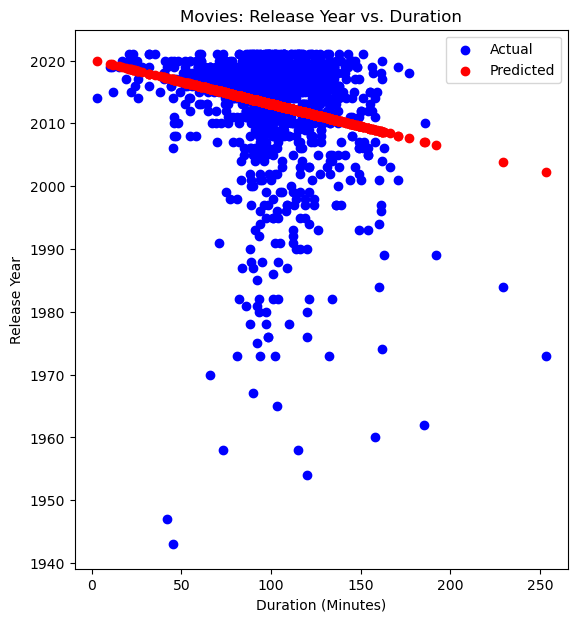

In [62]:
# Visualization for Movies
plt.figure(figsize=[14, 7])

plt.subplot(1, 2, 1)
plt.scatter(X_test_movies, y_test_movies, color='blue', label='Actual')
plt.scatter(X_test_movies, y_pred_movies, color='red', label='Predicted')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Release Year')
plt.title('Movies: Release Year vs. Duration')
plt.legend()

In [61]:
# For TV Shows
X_tv_shows = tv_shows[['duration_minutes']]
y_tv_shows = tv_shows['release_year']

# Split the data into training and testing sets
X_train_tv_shows, X_test_tv_shows, y_train_tv_shows, y_test_tv_shows = train_test_split(X_tv_shows, y_tv_shows, test_size=0.2, random_state=42)

# Fit the linear regression model
model_tv_shows = LinearRegression()
model_tv_shows.fit(X_train_tv_shows, y_train_tv_shows)

# Predict and evaluate the model
y_pred_tv_shows = model_tv_shows.predict(X_test_tv_shows)
r_squared_tv_shows = model_tv_shows.score(X_test_tv_shows, y_test_tv_shows)
mse_tv_shows = np.mean((y_pred_tv_shows - y_test_tv_shows) ** 2)

print(f'TV Shows - R-squared: {r_squared_tv_shows:.2f}, Mean Squared Error: {mse_tv_shows:.2f}')

TV Shows - R-squared: 0.02, Mean Squared Error: 25.23


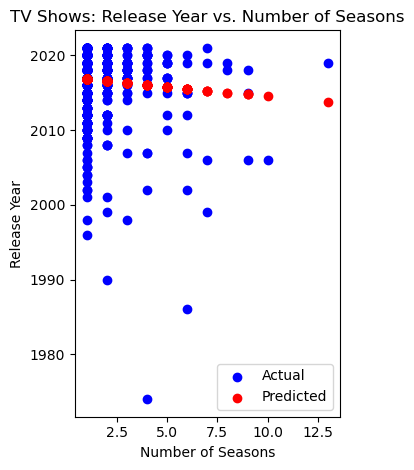

In [63]:
# Visualization for TV Shows
plt.subplot(1, 2, 2)
plt.scatter(X_test_tv_shows, y_test_tv_shows, color='blue', label='Actual')
plt.scatter(X_test_tv_shows, y_pred_tv_shows, color='red', label='Predicted')
plt.xlabel('Number of Seasons')
plt.ylabel('Release Year')
plt.title('TV Shows: Release Year vs. Number of Seasons')
plt.legend()

plt.tight_layout()
plt.show()